In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

/Users/nthain/homebrew/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/nthain/homebrew/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
pd.set_option('max_colwidth', 1000)

In [3]:
def plot_hist(df, bins = None):
    c_vals = [0,1]
    plt.hist([df.loc[df.constructive_binary == x, 'comment_len'] for x in c_vals], bins = bins)
    plt.legend(['FP', 'FN'])
    plt.show()

### Analysis

In [4]:
lb_scored = pd.read_csv('data/scored/CNN_LB_predictions.csv')
c3_scored = pd.read_csv('data/scored/CNN_C3_test_predictions.csv')

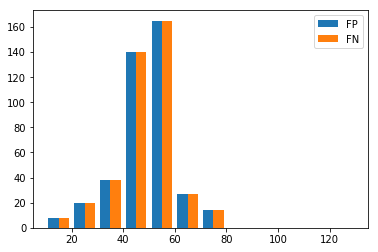

In [7]:
plot_hist(lb_scored, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130])

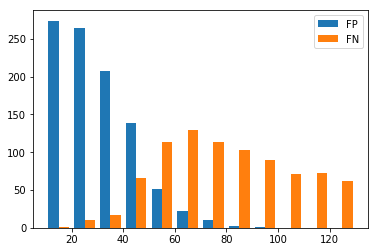

In [8]:
plot_hist(c3_scored, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130])

In [9]:
def roc_f1(df, threshold = 0.5):
    roc = metrics.roc_auc_score(df['constructive_binary'], df['prediction proba'])
    f1 = metrics.f1_score(df['constructive_binary'], df['prediction proba'] >= threshold)
    return roc, f1

In [10]:
roc_f1(lb_scored)

(0.6152735884626261, 0.222680412371134)

In [11]:
roc_f1(c3_scored)

(0.9657999609394414, 0.9204501358168413)

In [12]:
all_c3 = pd.read_csv('data/processed/C3_preprocessed.csv')

In [13]:
all_c3['comment_len'] = all_c3.comment_text.apply(lambda x: len(x.strip().split()))

In [14]:
all_c3[['constructive', 'comment_len']].corr()

,constructive,comment_len
constructive,1.000000,0.648976
comment_len,0.648976,1.000000


### CNN Analysis

In [52]:
c3_scored[['constructive', 'prediction proba', 'comment_len']].corr()

,constructive,prediction proba,comment_len
constructive,1.000000,0.874362,0.661836
prediction proba,0.874362,1.000000,0.650867
comment_len,0.661836,0.650867,1.000000


In [17]:
# Histogram of false positives and false negatives by length
c3_errors = c3_scored.query('constructive_binary != prediction')

In [18]:
c3_scored.shape

(2400, 76)

In [19]:
c3_errors.shape

(205, 76)

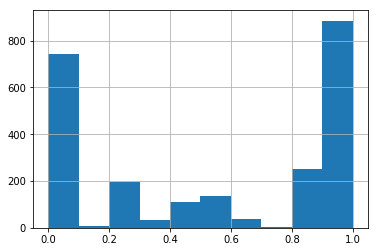

In [20]:
# Verifying that c3_scored includes ambiguous instances
c3_scored.constructive.hist()

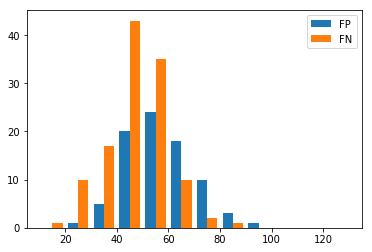

In [21]:
# Legend corresponds to true labels
# So blue is False Positive (label = 0.0, prediction = 1.0)
# Orange is False Negative (label = 1.0, prediction = 0.0)
plot_hist(c3_errors, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130])

In [22]:
# False Negatives
c3_errors.query('prediction == 0').comment_len.mean()

48.96694214876033

In [23]:
# False Positives
c3_errors.query('prediction == 1').comment_len.mean()

59.32142857142857

In [51]:
c3_errors[['constructive', 'prediction proba', 'comment_len']].corr()

,constructive,prediction proba,comment_len
constructive,1.000000,-0.742278,-0.067491
prediction proba,-0.742278,1.000000,0.327476
comment_len,-0.067491,0.327476,1.000000


### Gru Analysis

In [25]:
c3_gru = pd.read_csv('data/scored/biLSTM_C3_test_predictions.csv')

In [26]:
c3_gru[['constructive', 'prediction proba', 'comment_len']].corr()

,constructive,prediction proba,comment_len
constructive,1.000000,0.914334,0.661836
prediction proba,0.914334,1.000000,0.703055
comment_len,0.661836,0.703055,1.000000


In [27]:
gru_errors = c3_gru.query('constructive_binary != prediction')

In [28]:
print(c3_gru.shape)
print(gru_errors.shape)

(2400, 76)
(174, 76)


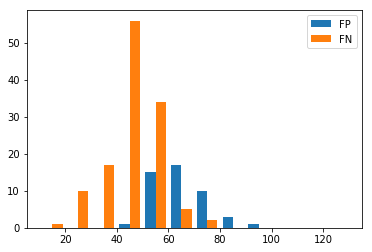

In [29]:
# Legend corresponds to true labels
# So blue is False Positive (label = 0.0, prediction = 1.0)
# Orange is False Negative (label = 1.0, prediction = 0.0)
plot_hist(gru_errors, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130])

In [30]:
print('FN: %s' % gru_errors.query('prediction == 0').comment_len.mean())
print('FP: %s' % gru_errors.query('prediction == 1').comment_len.mean())

FN: 45.44
FP: 69.3265306122449


In [31]:
gru_errors[['constructive', 'prediction proba', 'comment_len']].corr()

,constructive,prediction proba,comment_len
constructive,1.000000,-0.609921,-0.413265
prediction proba,-0.609921,1.000000,0.759133
comment_len,-0.413265,0.759133,1.000000


### Feature Based

In [32]:
c3_feature = pd.read_csv('data/scored/feature_based_model_predictions.csv')

In [33]:
c3_feature.columns

Index(['comment_counter', 'comment_text', 'pp_comment_text',
       'constructive_binary', 'predictions', 'prediction_proba',
       'comment_len'],
      dtype='object')

In [34]:
c3_feature['prediction_proba_1'] = c3_feature['prediction_proba'].apply(lambda x: float(x.split()[1][:-1]))

In [35]:
c3_feature[['constructive_binary', 'predictions', 'prediction_proba_1', 'comment_len']].corr()

,constructive_binary,predictions,prediction_proba_1,comment_len
constructive_binary,1.000000,0.868264,0.895111,0.615793
predictions,0.868264,1.000000,0.974913,0.636432
prediction_proba_1,0.895111,0.974913,1.000000,0.684537
comment_len,0.615793,0.636432,0.684537,1.000000


In [36]:
feature_errors = c3_feature.query('constructive_binary != predictions')

In [37]:
print(c3_feature.shape)
print(feature_errors.shape)

(2400, 8)
(157, 8)


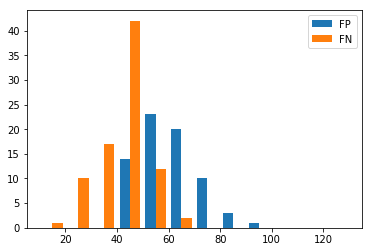

In [38]:
# Legend corresponds to true labels
# So blue is False Positive (label = 0.0, prediction = 1.0)
# Orange is False Negative (label = 1.0, prediction = 0.0)
plot_hist(feature_errors, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130])

In [39]:
print('FN: %s' % feature_errors.query('predictions == 0').comment_len.mean())
print('FP: %s' % feature_errors.query('predictions == 1').comment_len.mean())

FN: 41.80952380952381
FP: 63.465753424657535


In [40]:
feature_errors[['constructive_binary', 'predictions', 'prediction_proba_1', 'comment_len']].corr()

,constructive_binary,predictions,prediction_proba_1,comment_len
constructive_binary,1.000000,-1.000000,-0.863442,-0.560345
predictions,-1.000000,1.000000,0.863442,0.560345
prediction_proba_1,-0.863442,0.863442,1.000000,0.750736
comment_len,-0.560345,0.560345,0.750736,1.000000


### BERT

In [41]:
c3_bert = pd.read_csv('data/scored/bert_scored_c3_test.csv')

In [42]:
c3_bert.corr()

,constructive_binary,comment_len,prediction proba,prediction
constructive_binary,1.000000,0.622105,0.879112,0.842165
comment_len,0.622105,1.000000,0.693989,0.622780
prediction proba,0.879112,0.693989,1.000000,0.960820
prediction,0.842165,0.622780,0.960820,1.000000


In [43]:
bert_errors = c3_bert.query('constructive_binary != prediction')

In [44]:
print(c3_bert.shape)
print(bert_errors.shape)

(2400, 5)
(188, 5)


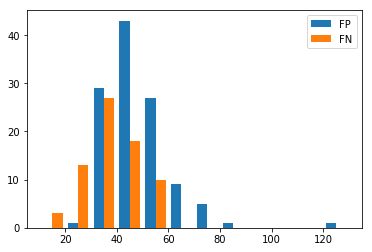

In [45]:
# Legend corresponds to true labels
# So blue is False Positive (label = 0.0, prediction = 1.0)
# Orange is False Negative (label = 1.0, prediction = 0.0)
plot_hist(bert_errors, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130])

In [46]:
print('FN: %s' % bert_errors.query('prediction == 0').comment_len.mean())
print('FP: %s' % bert_errors.query('prediction == 1').comment_len.mean())

FN: 36.91549295774648
FP: 48.84615384615385


In [47]:
bert_errors.corr()

,constructive_binary,comment_len,prediction proba,prediction
constructive_binary,1.000000,-0.363415,-0.832806,-1.000000
comment_len,-0.363415,1.000000,0.556085,0.363415
prediction proba,-0.832806,0.556085,1.000000,0.832806
prediction,-1.000000,0.363415,0.832806,1.000000


### All Plots

In [48]:
all_errors = [feature_errors, gru_errors, c3_errors, bert_errors]
plt_titles = ['Feature Based', 'biLSTM', 'CNN', 'BERT']

In [49]:
def plot_all_hists(dfs, titles, bins = None):
    fig = plt.figure()
    c_vals = [0,1]
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    axs = [ax1, ax2, ax3, ax4]
    for i,ax in enumerate(axs):
        ax.title.set_text(titles[i])
        ax.hist([dfs[i].loc[dfs[i].constructive_binary == x, 'comment_len'] for x in c_vals], bins = bins)
    ax2.legend(['FP', 'FN'])
    fig.tight_layout()
    plt.show()

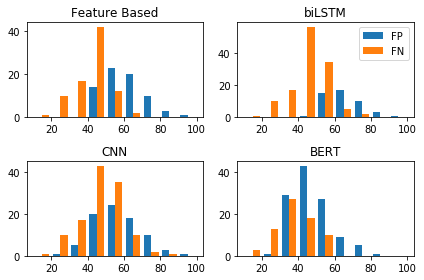

In [50]:
plot_all_hists(all_errors, plt_titles, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])